## Import Libraries

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch.optim as optim
from torchvision import models
from torchvision import transforms as tf
import torch.nn.functional as F

### Load Alexnet
* get the features portion from alexnet
* freeze all alexnet parameters

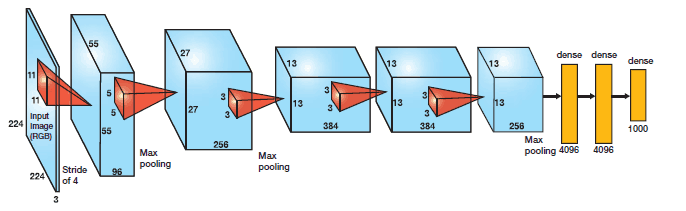

In [2]:
alexnet = models.alexnet(pretrained=True).features

for param in alexnet.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/jupyter/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:08, 28838205.79it/s]


In [3]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
    
alexnet.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

### Load the images

In [4]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [5]:
def transformation(img):
    
    tasks = tf.Compose([tf.Resize(256), 
                        tf.ToTensor(),
                        tf.Normalize(mean, std)])
    
    img = tasks(img)  
    img = img.unsqueeze(0)    
    
    return img

In [6]:
content_img = Image.open("cat.jpg").convert('RGB')
style_img   = Image.open("starry_night.jpg").convert('RGB')

In [7]:
content_img.size

(650, 650)

In [8]:
list(content_img.getdata())

[(192, 187, 194),
 (190, 187, 194),
 (189, 186, 193),
 (190, 188, 193),
 (189, 186, 193),
 (190, 185, 192),
 (186, 185, 191),
 (187, 184, 191),
 (185, 184, 190),
 (185, 182, 189),
 (183, 182, 188),
 (182, 179, 186),
 (183, 180, 187),
 (180, 177, 184),
 (177, 176, 182),
 (178, 175, 182),
 (176, 173, 180),
 (175, 172, 181),
 (171, 170, 178),
 (169, 168, 174),
 (168, 167, 175),
 (165, 164, 172),
 (163, 162, 170),
 (160, 159, 167),
 (157, 156, 164),
 (157, 155, 166),
 (155, 154, 162),
 (152, 151, 159),
 (151, 150, 158),
 (151, 149, 160),
 (151, 149, 162),
 (151, 149, 162),
 (152, 152, 162),
 (152, 152, 162),
 (155, 155, 165),
 (155, 158, 167),
 (160, 158, 169),
 (161, 161, 173),
 (163, 163, 175),
 (166, 166, 178),
 (165, 169, 181),
 (168, 170, 183),
 (173, 173, 183),
 (175, 175, 187),
 (179, 179, 191),
 (183, 183, 195),
 (185, 185, 195),
 (189, 187, 200),
 (194, 192, 203),
 (195, 193, 204),
 (198, 196, 207),
 (201, 199, 210),
 (204, 201, 212),
 (204, 202, 213),
 (206, 206, 216),
 (209, 206

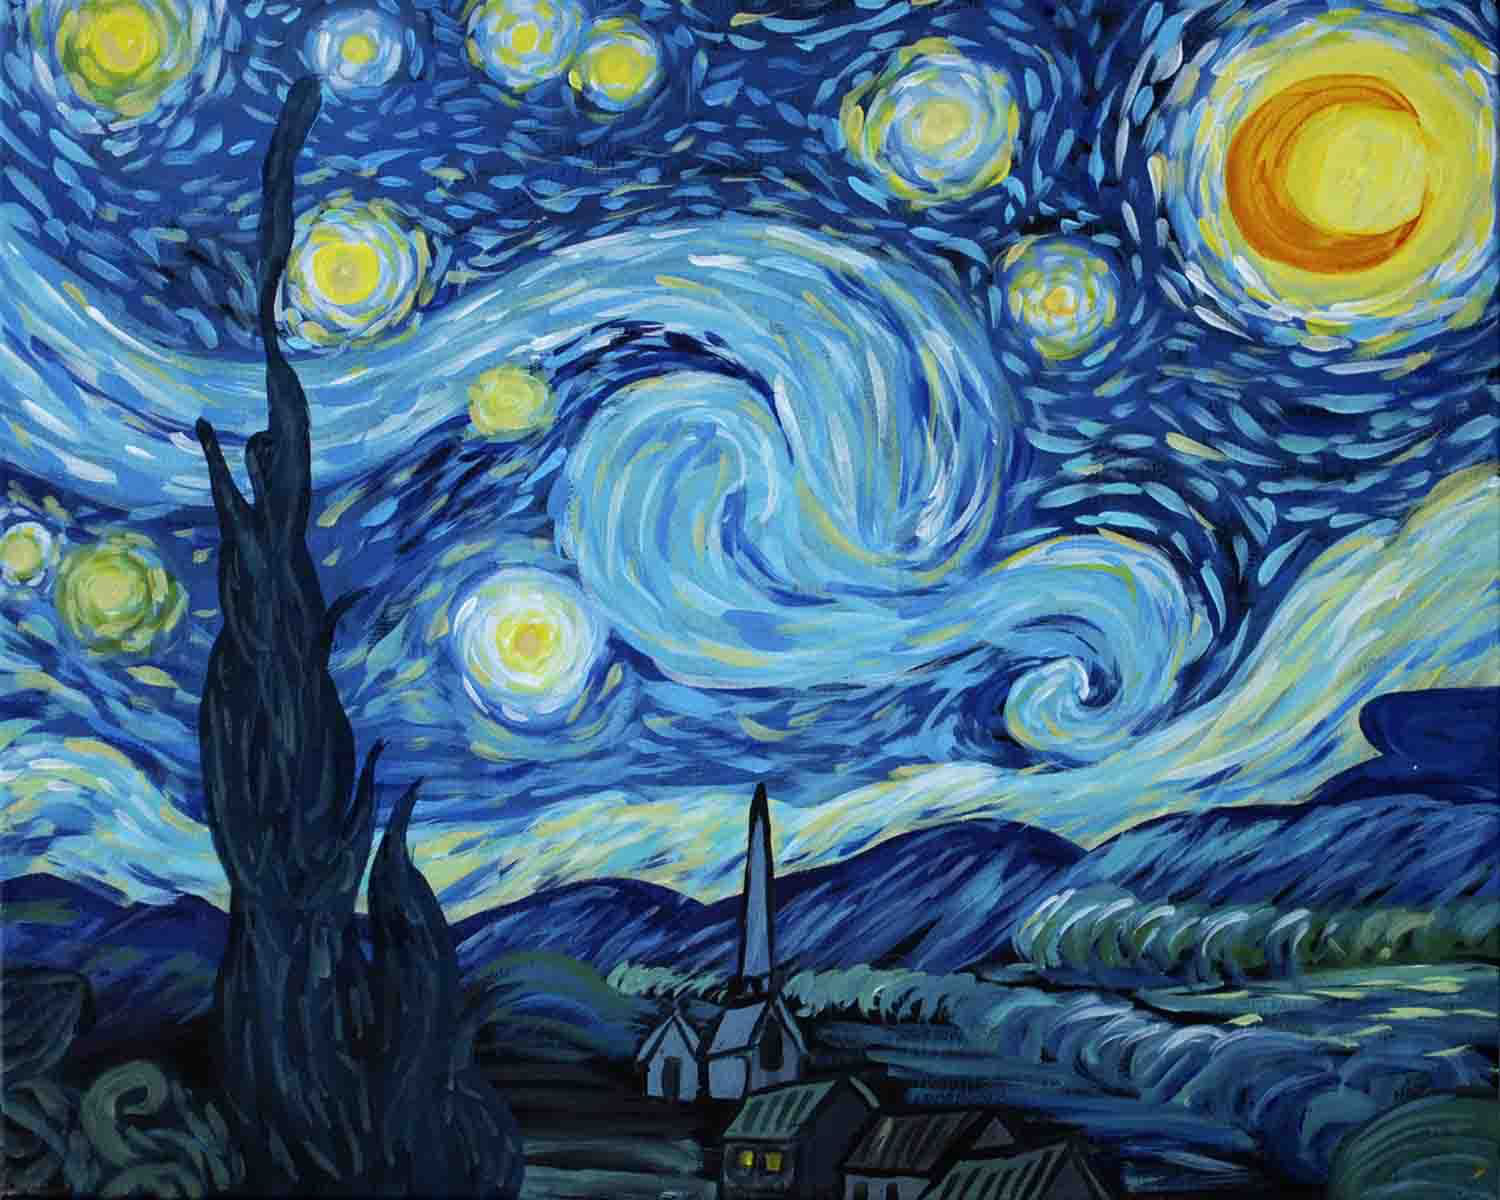

In [9]:
style_img

In [10]:
style_img.size

(1500, 1200)

In [11]:
list(style_img.getdata())

[(107, 175, 220),
 (102, 170, 215),
 (95, 162, 207),
 (85, 149, 195),
 (74, 136, 183),
 (63, 124, 171),
 (58, 114, 163),
 (55, 108, 158),
 (30, 80, 131),
 (41, 87, 139),
 (55, 98, 151),
 (71, 110, 165),
 (85, 122, 177),
 (95, 130, 186),
 (100, 135, 191),
 (104, 136, 193),
 (85, 144, 202),
 (84, 140, 201),
 (87, 142, 207),
 (96, 149, 219),
 (99, 148, 224),
 (81, 126, 207),
 (45, 87, 171),
 (17, 55, 140),
 (35, 72, 153),
 (69, 103, 177),
 (110, 141, 208),
 (129, 160, 217),
 (130, 161, 208),
 (131, 161, 199),
 (141, 170, 202),
 (153, 183, 211),
 (139, 163, 227),
 (141, 165, 227),
 (142, 169, 224),
 (143, 174, 220),
 (145, 179, 216),
 (147, 184, 213),
 (147, 189, 211),
 (145, 192, 208),
 (162, 211, 226),
 (138, 191, 207),
 (104, 159, 180),
 (75, 132, 159),
 (60, 119, 153),
 (64, 123, 163),
 (79, 137, 183),
 (89, 150, 197),
 (90, 124, 185),
 (99, 134, 192),
 (113, 148, 204),
 (127, 163, 215),
 (138, 174, 222),
 (142, 179, 221),
 (144, 179, 217),
 (143, 179, 213),
 (131, 167, 199),
 (129, 16

In [12]:
content_img = transformation(content_img).to(device)
style_img   = transformation(style_img).to(device)

In [13]:
content_img.shape

torch.Size([1, 3, 400, 400])

In [14]:
content_img

tensor([[[[ 1.1529,  1.1358,  1.1187,  ..., -0.2342, -0.2513, -0.2342],
          [ 1.1358,  1.1358,  1.1015,  ..., -0.3027, -0.3027, -0.3027],
          [ 1.1358,  1.1187,  1.1015,  ..., -0.3712, -0.3712, -0.3712],
          ...,
          [ 1.4269,  1.3927,  1.3927,  ...,  1.1529,  1.1700,  1.1529],
          [ 1.4269,  1.3755,  1.3755,  ...,  1.1529,  1.1529,  1.1358],
          [ 1.4098,  1.3927,  1.3755,  ...,  1.1529,  1.1358,  1.1358]],

         [[ 1.2381,  1.2381,  1.2381,  ...,  0.0301,  0.0301,  0.0126],
          [ 1.2381,  1.2381,  1.2206,  ..., -0.0224, -0.0224, -0.0224],
          [ 1.2381,  1.2381,  1.2031,  ..., -0.0924, -0.0924, -0.0924],
          ...,
          [ 1.5357,  1.5357,  1.5357,  ...,  1.3081,  1.3081,  1.3081],
          [ 1.5357,  1.5357,  1.5182,  ...,  1.3081,  1.3081,  1.3081],
          [ 1.5532,  1.5357,  1.5182,  ...,  1.3081,  1.3081,  1.2906]],

         [[ 1.5768,  1.5594,  1.5594,  ...,  0.4091,  0.4091,  0.4091],
          [ 1.5594,  1.5594,  

In [15]:
style_img.shape

torch.Size([1, 3, 400, 500])

In [16]:
style_img

tensor([[[[-0.3883, -0.7822, -1.2445,  ..., -1.4843, -1.5528, -2.0837],
          [-0.3198, -0.5767, -0.9192,  ..., -1.2617, -1.8439, -2.1008],
          [-0.2513, -0.4568, -0.6794,  ..., -1.1589, -1.5699, -2.0837],
          ...,
          [-0.8678, -1.0390, -0.9363,  ..., -1.7069, -1.8439, -1.7069],
          [-1.1075, -1.5870, -1.5699,  ..., -1.5185, -1.6727, -1.6727],
          [-1.5357, -1.9467, -1.8610,  ..., -1.3130, -1.4500, -1.5699]],

         [[ 0.9055,  0.4153, -0.2150,  ..., -1.0378, -1.3529, -2.0182],
          [ 0.9930,  0.6254,  0.1176,  ..., -0.7052, -1.5980, -1.9832],
          [ 1.0455,  0.7479,  0.3627,  ..., -0.4776, -1.1604, -1.8782],
          ...,
          [-0.7752, -0.9503, -0.8452,  ..., -1.1954, -1.3354, -1.1954],
          [-1.0203, -1.5105, -1.4930,  ..., -1.0028, -1.1604, -1.1604],
          [-1.4580, -1.8782, -1.7906,  ..., -0.7927, -0.9328, -1.0553]],

         [[ 1.9080,  1.4548,  0.8797,  ..., -0.3055, -0.7761, -1.4733],
          [ 1.9951,  1.6640,  

### Define a method to convert tensors to images
* Clone the tensor
* Convert the tensor to a numpy array and squeeze it to make it 3d
* Transpose performs CHW -> HWC
* Normalize the image and clip the floats into the valid range for plotting

In [20]:
def tensor_to_image(tensor):

    image = tensor.clone().detach()
    image = image.cpu().numpy().squeeze()
    
    image = image.transpose(1, 2, 0)
    
    image *= np.array(std) + np.array(mean)
    image = image.clip(0, 1)
    
    return image

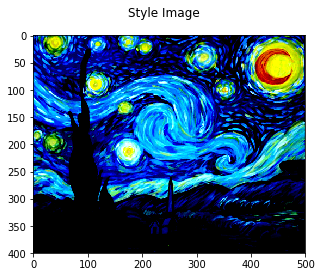

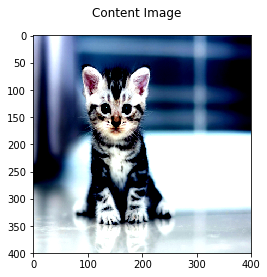

In [19]:
img = tensor_to_image(style_img)
fig = plt.figure()
fig.suptitle('Style Image')
plt.imshow(img)

img = tensor_to_image(content_img)
fig = plt.figure()
fig.suptitle('Content Image')
plt.imshow(img)

### Extract features
* We use layers 0,3, and 6 for style information and layer 8 for the content information.

In [21]:
LAYERS_OF_INTEREST = {'0': 'conv1_1', 
                      '3': 'conv2_1',  
                      '6': 'conv3_1',
                      '8': 'conv3_2',
                      '10': 'conv3_3'}

In [22]:
def apply_model_and_extract_features(image, model):
    x = image

    features = {}
    
    for name, layer in model._modules.items():
        x = layer(x)
        
        if name in LAYERS_OF_INTEREST:
            features[LAYERS_OF_INTEREST[name]] = x   
            
    return features

In [23]:
content_img_features = apply_model_and_extract_features(content_img, alexnet)
style_img_features   = apply_model_and_extract_features(style_img, alexnet)

In [24]:
content_img_features

{'conv1_1': tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [3.3689e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]],
 
          [[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0

In [25]:
style_img_features

{'conv1_1': tensor([[[[0.8356, 0.0000, 0.0000,  ..., 1.7181, 0.0000, 1.8301],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.4792, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.8928, 0.8519,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.6675, 0.0443,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.1460],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.7832],
           ...,
           [1.2520, 1.3683, 0.7879,  ..., 0.0000, 0.0000, 2.2593],
           [1.6194, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 2.1901],
           [0.8701, 0.0056, 0.2439,  ..., 0.0000, 0.0000, 1.9901]],
 
          [[0.0000, 2.9284, 0.0000,  ..., 1.2257, 0.0000, 0.0000],
           [0.0000, 1.4463, 0.6297,  ..., 0.0000, 0.1108, 0.0000],
           [0

Feature correlations are given by the Gram matrix G, where every cell (i, j) in G is the inner product between the vectorised feature maps i and j in a layer.

In [26]:
def calculate_gram_matrix(tensor):
    
    _, channels, height, width = tensor.size()
    
    tensor = tensor.view(channels, height * width)    
    
    gram_matrix = torch.mm(tensor, tensor.t())
    
    gram_matrix = gram_matrix.div(channels * height * width) 
    
    return gram_matrix

In [27]:
style_features_gram_matrix = {layer: calculate_gram_matrix(style_img_features[layer]) for layer in 
                                                    style_img_features}

style_features_gram_matrix

{'conv1_1': tensor([[0.0211, 0.0005, 0.0057,  ..., 0.0078, 0.0181, 0.0031],
         [0.0005, 0.0020, 0.0013,  ..., 0.0003, 0.0012, 0.0003],
         [0.0057, 0.0013, 0.0449,  ..., 0.0061, 0.0240, 0.0046],
         ...,
         [0.0078, 0.0003, 0.0061,  ..., 0.0208, 0.0122, 0.0038],
         [0.0181, 0.0012, 0.0240,  ..., 0.0122, 0.0559, 0.0068],
         [0.0031, 0.0003, 0.0046,  ..., 0.0038, 0.0068, 0.0134]],
        device='cuda:0'),
 'conv2_1': tensor([[0.0122, 0.0009, 0.0007,  ..., 0.0006, 0.0001, 0.0000],
         [0.0009, 0.0296, 0.0017,  ..., 0.0027, 0.0014, 0.0000],
         [0.0007, 0.0017, 0.0168,  ..., 0.0006, 0.0007, 0.0000],
         ...,
         [0.0006, 0.0027, 0.0006,  ..., 0.0120, 0.0018, 0.0000],
         [0.0001, 0.0014, 0.0007,  ..., 0.0018, 0.0032, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
        device='cuda:0'),
 'conv3_1': tensor([[0.0039, 0.0007, 0.0006,  ..., 0.0006, 0.0004, 0.0002],
         [0.0007, 0.0188, 0.0080,  ..., 

### Perform Style Transfer

In [28]:
weights = {'conv1_1': 1.0, 'conv2_1': 0.8, 'conv3_1': 0.25}

In [29]:
target = content_img.clone().requires_grad_(True).to(device)

optimizer = optim.RMSprop([target], lr=0.003)

### Start the loss minimization process 
* Run the loop for some large number of iterations. 
* Calculate the content loss (from content image and target) using mse
* Calculate the style loss (from style image and target) using mse
* The combined loss is then backpropagated and minimised.
* Using the minimized loss, the network parameters are updated which further updates the target image.

In [30]:
for i in range(1, 2000):
    
    target_features = apply_model_and_extract_features(target, alexnet)
    
    content_loss = F.mse_loss (target_features['conv3_1'], content_img_features['conv3_1'])
    
    style_loss = 0
    for layer in weights:
        
        target_feature = target_features[layer]

        target_gram_matrix = calculate_gram_matrix(target_feature)

        style_gram_matrix = style_features_gram_matrix[layer]
        
        layer_loss = F.mse_loss (target_gram_matrix, style_gram_matrix)
        layer_loss *= weights[layer]
        
        _, channels, height, width = target_feature.shape

        style_loss += layer_loss  
    
    total_loss = 1000000 * style_loss + content_loss
    
    if i % 50 == 0:
        print ('Epoch {}:, Style Loss : {:4f}, Content Loss : {:4f}'.format( i, style_loss, content_loss))
    
    optimizer.zero_grad()
    
    total_loss.backward()
    
    optimizer.step()

Epoch 50:, Style Loss : 0.000092, Content Loss : 2.087402
Epoch 100:, Style Loss : 0.000038, Content Loss : 2.213543
Epoch 150:, Style Loss : 0.000023, Content Loss : 2.146372
Epoch 200:, Style Loss : 0.000016, Content Loss : 2.062105
Epoch 250:, Style Loss : 0.000012, Content Loss : 1.979225
Epoch 300:, Style Loss : 0.000009, Content Loss : 1.897670
Epoch 350:, Style Loss : 0.000007, Content Loss : 1.820212
Epoch 400:, Style Loss : 0.000005, Content Loss : 1.744950
Epoch 450:, Style Loss : 0.000004, Content Loss : 1.684638
Epoch 500:, Style Loss : 0.000003, Content Loss : 1.624389
Epoch 550:, Style Loss : 0.000003, Content Loss : 1.564852
Epoch 600:, Style Loss : 0.000002, Content Loss : 1.507471
Epoch 650:, Style Loss : 0.000002, Content Loss : 1.452649
Epoch 700:, Style Loss : 0.000002, Content Loss : 1.401645
Epoch 750:, Style Loss : 0.000002, Content Loss : 1.357504
Epoch 800:, Style Loss : 0.000002, Content Loss : 1.322285
Epoch 850:, Style Loss : 0.000001, Content Loss : 1.28996

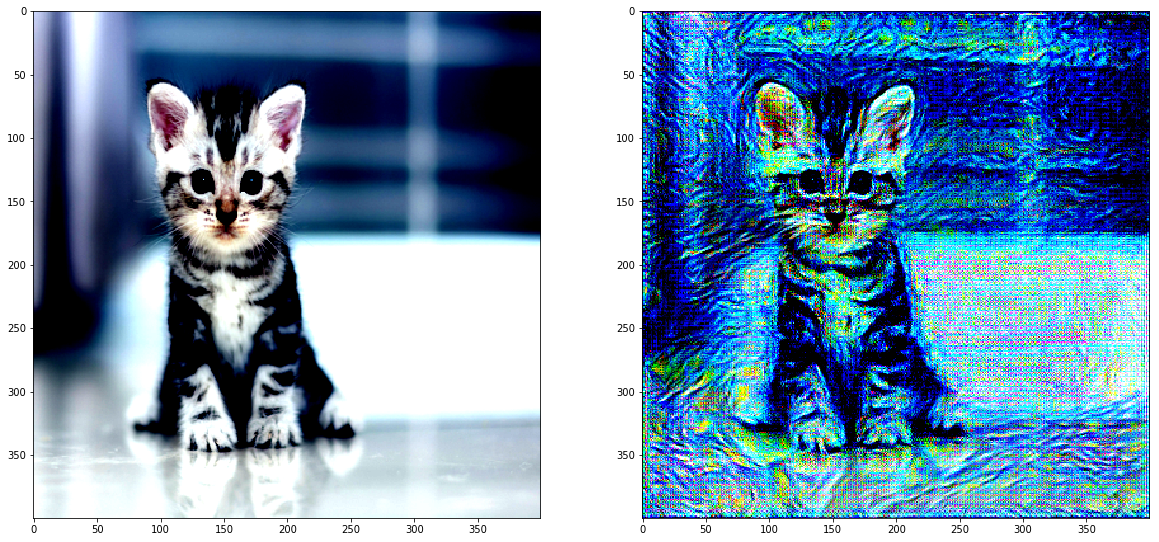

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))